<a href="https://colab.research.google.com/github/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection/blob/master/ALAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Access to Code and Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd ../../

/content


In [ ]:
ls

In [6]:
!rm -rf Adversarially-Learned-Anomaly-Detection

In [2]:
!git clone https://github.com/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection

Cloning into 'Adversarially-Learned-Anomaly-Detection'...
remote: Enumerating objects: 947, done.
remote: Counting objects: 100% (881/881), done.
remote: Compressing objects: 100% (687/687), done.
remote: Total 947 (delta 428), reused 531 (delta 155), pack-reused 66
Receiving objects: 100% (947/947), 41.06 MiB | 19.17 MiB/s, done.
Resolving deltas: 100% (450/450), done.


# **Run Model**

In [3]:
cd /content/Adversarially-Learned-Anomaly-Detection/alad

/content/Adversarially-Learned-Anomaly-Detection/alad


In [27]:
ls

 arrhythmia_utilities.py  'loss discriminator.png'   run.py
 cifar10_utilities.py      __pycache__/              svhn_utilities.py
 kdd_utilities.py          results/


In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [12]:
!python run.py

Instructions for updating:
non-resource variables are not supported in the long term
start round  0
random seed =  0
Data loading...
(3580, 32, 32, 3)
Building graph...
ALAD is training with the following parameters:
Number of Epochs:  100
Batch size:  32
Degree for L norms:  2
Discriminator zz enabled:  False
Start training...
Epoch 0 | time = 13s | loss gen = 5.8133 | loss enc = 5.1955 | loss dis = 3.6496 | loss dis xz = 0.9437 | loss dis xx = 1.3202 | loss dis xxzz = 1.3857 | 
Epoch 1 | time = 8s | loss gen = 3.5481 | loss enc = 2.9032 | loss dis = 3.9114 | loss dis xz = 1.1460 | loss dis xx = 1.3791 | loss dis xxzz = 1.3863 | 
Epoch 2 | time = 8s | loss gen = 4.6514 | loss enc = 3.4377 | loss dis = 3.7073 | loss dis xz = 0.9189 | loss dis xx = 1.4021 | loss dis xxzz = 1.3863 | 
Epoch 3 | time = 8s | loss gen = 4.2439 | loss enc = 3.3216 | loss dis = 3.7117 | loss dis xz = 0.9497 | loss dis xx = 1.3756 | loss dis xxzz = 1.3863 | 
Epoch 4 | time = 8s | loss gen = 4.2500 | loss enc = 

# **Draw Dxxzz Network**

In [10]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


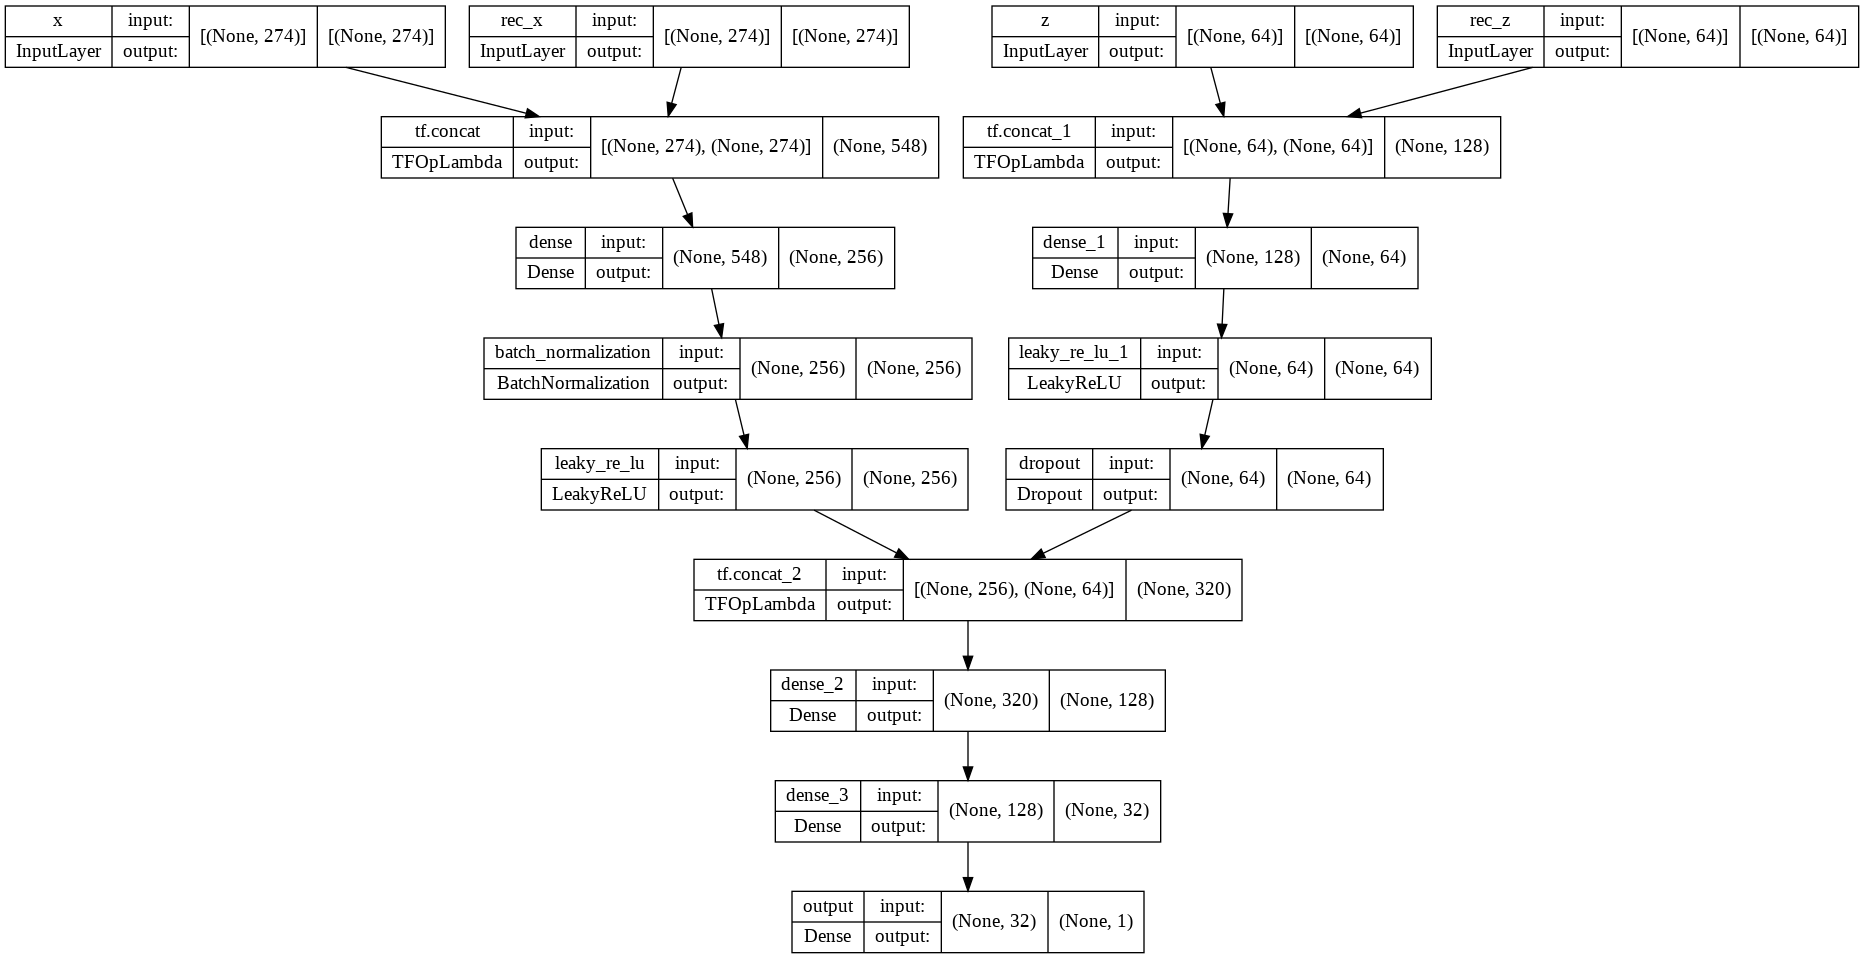

In [11]:
import tensorflow as tf

x = tf.keras.Input(shape=(274,), dtype='int32', name='x')
rec_x = tf.keras.Input(shape=(274,), dtype='int32', name='rec_x')
z = tf.keras.Input(shape=(64,), dtype='int32', name='z')
rec_z = tf.keras.Input(shape=(64,), dtype='int32', name='rec_z')

concat_x = tf.concat([x, rec_x], axis=1)
x1 = tf.keras.layers.Dense(256)(concat_x)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.LeakyReLU()(x1)

concat_z = tf.concat([z, rec_z], axis=1)
z1 = tf.keras.layers.Dense(64)(concat_z)
z1 = tf.keras.layers.LeakyReLU()(z1)
z1 = tf.keras.layers.Dropout(0.5)(z1)

y = tf.concat([x1, z1], axis=1)
y = tf.keras.layers.Dense(128, activation='relu')(y)
y = tf.keras.layers.Dense(32, activation='relu')(y)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(y)

model = tf.keras.Model(inputs=[x,rec_x,z,rec_z], outputs=[output])

tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96,
    layer_range=None, show_layer_activations=False)